In [32]:
from Model import Model
from utils import getImageSetDirectories, prepareSubmission, readBaselineCPSNR, plotLoss
import os
from DataLoader import SingleImageDataset, AllImageDataset
from torch.utils.data import DataLoader
import numpy as np
from DeepNetworks.SRCNN import SRCNN
from torch import nn
import torch.optim as optim
from torchvision import transforms
from Transforms import ToTensor, MinMaxNormalize
import torch
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create Model Object by passing a network object

In [2]:
network = SRCNN(in_channels=1, out_channels=1)
model = Model(network)

# Load Baseline Cpsnr for calculating the leaderboard score for validation data

In [26]:
data_directory = '../../data'
output_directory = os.path.join(data_directory, "output")
baseline_cpsnrs = readBaselineCPSNR(os.path.join(data_directory, 'norm.csv'))

In [3]:
baseline_cpsnrs

{'imgset0000': 52.352172662454414,
 'imgset0001': 46.46481216977547,
 'imgset0002': 48.646021401961406,
 'imgset0003': 45.70997052299149,
 'imgset0004': 52.94734611151589,
 'imgset0005': 46.25044028271171,
 'imgset0006': 46.48263405544359,
 'imgset0007': 44.132332693978185,
 'imgset0008': 56.94578786712914,
 'imgset0009': 44.71290353707409,
 'imgset0010': 45.54794325206883,
 'imgset0011': 46.83190353559333,
 'imgset0012': 47.112072384585105,
 'imgset0013': 49.16862472118279,
 'imgset0014': 44.856081915782696,
 'imgset0015': 46.40805343398219,
 'imgset0016': 52.24819752721986,
 'imgset0017': 47.424599524992175,
 'imgset0018': 49.858419022257536,
 'imgset0019': 46.50850416644238,
 'imgset0020': 49.49301291366183,
 'imgset0021': 47.88701468750938,
 'imgset0022': 44.63208343569644,
 'imgset0023': 46.57071299180883,
 'imgset0024': 45.933317141088985,
 'imgset0025': 53.285722493501275,
 'imgset0026': 53.31164204181115,
 'imgset0027': 50.439151313917314,
 'imgset0028': 47.856879936202745,
 'i

# Load train and test imageset directories in two lists

In [28]:
train_set_directories = getImageSetDirectories(os.path.join(data_directory, "train"))
test_set_directories = getImageSetDirectories(os.path.join(data_directory, "test"))
train_set_directories

['../../data/train/RED/imgset0542',
 '../../data/train/RED/imgset0535',
 '../../data/train/RED/imgset0438',
 '../../data/train/RED/imgset0172',
 '../../data/train/RED/imgset0091',
 '../../data/train/RED/imgset0105',
 '../../data/train/RED/imgset0008',
 '../../data/train/RED/imgset0178',
 '../../data/train/RED/imgset0002',
 '../../data/train/RED/imgset0196',
 '../../data/train/RED/imgset0075',
 '../../data/train/RED/imgset0548',
 '../../data/train/RED/imgset0432',
 '../../data/train/RED/imgset0445',
 '../../data/train/RED/imgset0398',
 '../../data/train/RED/imgset0376',
 '../../data/train/RED/imgset0295',
 '../../data/train/RED/imgset0301',
 '../../data/train/RED/imgset0206',
 '../../data/train/RED/imgset0392',
 '../../data/train/RED/imgset0271',
 '../../data/train/RED/imgset0137',
 '../../data/train/RED/imgset0140',
 '../../data/train/RED/imgset0493',
 '../../data/train/RED/imgset0507',
 '../../data/train/RED/imgset0570',
 '../../data/train/RED/imgset0499',
 '../../data/train/RED/imgse

# Split into train and validation based on a given percentage for validation

In [46]:
val_proportion = 0.10
train_list, val_list = train_test_split(train_set_directories, test_size=val_proportion, random_state=1, shuffle=True)

# Creating dataloader objects

In [6]:
transform = transforms.Compose([
        ToTensor(),
        MinMaxNormalize()
    ])
train_dataset = SingleImageDataset(image_set_directories=train_list, isClearest=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

val_dataset = SingleImageDataset(image_set_directories=val_list, isClearest=True, transform=transform)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Set the loss function and optimizer

In [7]:
learning_rate = 0.0001
criterion = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

# Starte training and select the best model based on the validation loss

In [8]:
best_model, train_history, val_history = model.train(train_dataloader, val_dataloader, criterion, optimizer, baseline_cpsnrs, num_epochs=500)

Epoch 0/499
----------
train Loss: 0.00498110
val Loss: 0.00115864
val score: 1.15879702

Epoch 1/499
----------
train Loss: 0.00094118
val Loss: 0.00078776
val score: 1.12600724

Epoch 2/499
----------
train Loss: 0.00048181
val Loss: 0.00034745
val score: 1.07271385

Epoch 3/499
----------
train Loss: 0.00024064
val Loss: 0.00024797
val score: 1.06018658

Epoch 4/499
----------
train Loss: 0.00020278
val Loss: 0.00023864
val score: 1.05840906

Epoch 5/499
----------
train Loss: 0.00019498
val Loss: 0.00023033
val score: 1.05660000

Epoch 6/499
----------
train Loss: 0.00018911
val Loss: 0.00022363
val score: 1.05509297

Epoch 7/499
----------
train Loss: 0.00018212
val Loss: 0.00021617
val score: 1.05391714

Epoch 8/499
----------
train Loss: 0.00017480
val Loss: 0.00020799
val score: 1.05345680

Epoch 9/499
----------
train Loss: 0.00016763
val Loss: 0.00020200
val score: 1.05117700

Epoch 10/499
----------
train Loss: 0.00016231
val Loss: 0.00019706
val score: 1.05146714

Epoch 11/

train Loss: 0.00011307
val Loss: 0.00014547
val score: 1.02942702

Epoch 91/499
----------
train Loss: 0.00011543
val Loss: 0.00014386
val score: 1.02986196

Epoch 92/499
----------
train Loss: 0.00011316
val Loss: 0.00014603
val score: 1.02964605

Epoch 93/499
----------
train Loss: 0.00011536
val Loss: 0.00015613
val score: 1.02993267

Epoch 94/499
----------
train Loss: 0.00011465
val Loss: 0.00014321
val score: 1.02940440

Epoch 95/499
----------
train Loss: 0.00011236
val Loss: 0.00014997
val score: 1.02925339

Epoch 96/499
----------
train Loss: 0.00011708
val Loss: 0.00014269
val score: 1.02930727

Epoch 97/499
----------
train Loss: 0.00011415
val Loss: 0.00014512
val score: 1.02888010

Epoch 98/499
----------
train Loss: 0.00011472
val Loss: 0.00014422
val score: 1.02924986

Epoch 99/499
----------
train Loss: 0.00011355
val Loss: 0.00014329
val score: 1.02885240

Epoch 100/499
----------
train Loss: 0.00011146
val Loss: 0.00014269
val score: 1.02890074

Epoch 101/499
--------

val Loss: 0.00014180
val score: 1.02361634

Epoch 180/499
----------
train Loss: 0.00011184
val Loss: 0.00014458
val score: 1.02358290

Epoch 181/499
----------
train Loss: 0.00010966
val Loss: 0.00014471
val score: 1.02451411

Epoch 182/499
----------
train Loss: 0.00011220
val Loss: 0.00014289
val score: 1.02344125

Epoch 183/499
----------
train Loss: 0.00011292
val Loss: 0.00014352
val score: 1.02329322

Epoch 184/499
----------
train Loss: 0.00011059
val Loss: 0.00014274
val score: 1.02363972

Epoch 185/499
----------
train Loss: 0.00011189
val Loss: 0.00014241
val score: 1.02352129

Epoch 186/499
----------
train Loss: 0.00011351
val Loss: 0.00014256
val score: 1.02313346

Epoch 187/499
----------
train Loss: 0.00011139
val Loss: 0.00014198
val score: 1.02294757

Epoch 188/499
----------
train Loss: 0.00011024
val Loss: 0.00014244
val score: 1.02312938

Epoch 189/499
----------
train Loss: 0.00011239
val Loss: 0.00014385
val score: 1.02374875

Epoch 190/499
----------
train Loss:

train Loss: 0.00011102
val Loss: 0.00014078
val score: 1.02067361

Epoch 270/499
----------
train Loss: 0.00010905
val Loss: 0.00014481
val score: 1.02052318

Epoch 271/499
----------
train Loss: 0.00011101
val Loss: 0.00015210
val score: 1.02051557

Epoch 272/499
----------
train Loss: 0.00011221
val Loss: 0.00014261
val score: 1.01983261

Epoch 273/499
----------
train Loss: 0.00011156
val Loss: 0.00014113
val score: 1.01978446

Epoch 274/499
----------
train Loss: 0.00010861
val Loss: 0.00014238
val score: 1.01979129

Epoch 275/499
----------
train Loss: 0.00010979
val Loss: 0.00014014
val score: 1.02016400

Epoch 276/499
----------
train Loss: 0.00011041
val Loss: 0.00014181
val score: 1.01978210

Epoch 277/499
----------
train Loss: 0.00011141
val Loss: 0.00015681
val score: 1.02001240

Epoch 278/499
----------
train Loss: 0.00011668
val Loss: 0.00015636
val score: 1.02004390

Epoch 279/499
----------
train Loss: 0.00011139
val Loss: 0.00014302
val score: 1.02025736

Epoch 280/499

val Loss: 0.00014022
val score: 1.01771334

Epoch 359/499
----------
train Loss: 0.00010816
val Loss: 0.00014132
val score: 1.01749232

Epoch 360/499
----------
train Loss: 0.00010941
val Loss: 0.00014678
val score: 1.01741204

Epoch 361/499
----------
train Loss: 0.00011371
val Loss: 0.00014066
val score: 1.01807025

Epoch 362/499
----------
train Loss: 0.00011019
val Loss: 0.00014069
val score: 1.01783387

Epoch 363/499
----------
train Loss: 0.00010806
val Loss: 0.00014798
val score: 1.01848280

Epoch 364/499
----------
train Loss: 0.00011388
val Loss: 0.00017827
val score: 1.01878516

Epoch 365/499
----------
train Loss: 0.00011613
val Loss: 0.00013999
val score: 1.01763136

Epoch 366/499
----------
train Loss: 0.00010810
val Loss: 0.00013986
val score: 1.01774984

Epoch 367/499
----------
train Loss: 0.00010843
val Loss: 0.00014018
val score: 1.01745220

Epoch 368/499
----------
train Loss: 0.00010827
val Loss: 0.00014075
val score: 1.01773564

Epoch 369/499
----------
train Loss:

train Loss: 0.00010904
val Loss: 0.00014098
val score: 1.01649018

Epoch 449/499
----------
train Loss: 0.00011050
val Loss: 0.00014507
val score: 1.01599821

Epoch 450/499
----------
train Loss: 0.00011038
val Loss: 0.00015038
val score: 1.01658443

Epoch 451/499
----------
train Loss: 0.00010872
val Loss: 0.00014206
val score: 1.01652569

Epoch 452/499
----------
train Loss: 0.00010870
val Loss: 0.00014567
val score: 1.01622970

Epoch 453/499
----------
train Loss: 0.00010954
val Loss: 0.00014927
val score: 1.01625242

Epoch 454/499
----------
train Loss: 0.00010981
val Loss: 0.00014489
val score: 1.01619651

Epoch 455/499
----------
train Loss: 0.00011048
val Loss: 0.00013952
val score: 1.01613207

Epoch 456/499
----------
train Loss: 0.00011007
val Loss: 0.00013969
val score: 1.01602469

Epoch 457/499
----------
train Loss: 0.00010979
val Loss: 0.00014056
val score: 1.01583589

Epoch 458/499
----------
train Loss: 0.00010848
val Loss: 0.00014024
val score: 1.01604668

Epoch 459/499

In [9]:
train_history

{'mse': [0.004981103402943435,
  0.0009411807650361549,
  0.00048180847195908425,
  0.00024063560434363105,
  0.00020278182161167601,
  0.00019498283604413947,
  0.00018911241844762116,
  0.0001821226761570539,
  0.0001747961178824136,
  0.00016763063401661137,
  0.0001623148533557965,
  0.00015714124630903826,
  0.00015178054714025082,
  0.0001495269654498605,
  0.0001441800297206183,
  0.0001410301707536829,
  0.00013785116162828425,
  0.00013679089262785222,
  0.0001325205936816267,
  0.00013090064603602514,
  0.00012890390480275858,
  0.00012907645998480306,
  0.00012819979583251882,
  0.00012536914987404916,
  0.0001252239413919266,
  0.00012345173189797523,
  0.0001223288656381721,
  0.00012100959191395139,
  0.0001221954378045418,
  0.0001218813243957067,
  0.0001211547967184081,
  0.00012008307763608172,
  0.00012045473619681698,
  0.00011838444910774177,
  0.0001197161571524868,
  0.00012056593650909649,
  0.00011841598109723153,
  0.00011924339820821346,
  0.00011716421243776

# Save the best model

In [ ]:
torch.save(best_model.state_dict(), 'SRCNN.pth')

# Plot the the train and validation loss

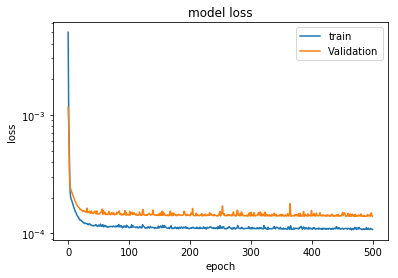

In [23]:
plotLoss(train_history['mse'], val_history['mse'])